In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [12]:
data1=pd.read_csv("homeprices (2).csv")
data1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [13]:
data1.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [14]:
median=data1['bedrooms'].median()

In [15]:
median

4.0

In [16]:
data1.iloc[2,1]=median

In [17]:
data1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


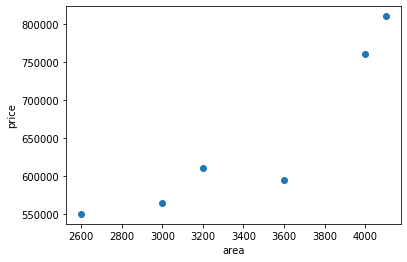

In [18]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(data1.area,data1.price)

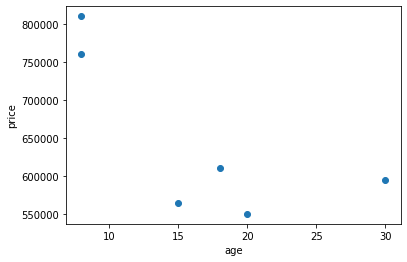

In [19]:
plt.xlabel("age")
plt.ylabel("price")

plt.scatter(data1.age,data1.price)

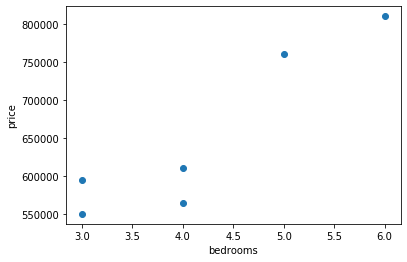

In [20]:
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.scatter(data1.bedrooms,data1.price)


In [21]:
x=data1.drop('price',axis=1)
y=data1['price']

In [22]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [24]:
model.intercept_

221323.00186540408

In [25]:
model.predict([[4000,3,20]])

array([675105.0516951])

In [27]:
y_pred=model.predict(x)
y_pred

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

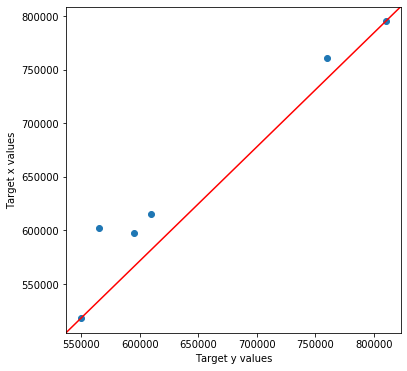

In [28]:
f,ax=plt.subplots(figsize=(6,6))
ax.scatter(y,y_pred)
plt.xlabel("Target y values")
plt.ylabel("Target x values")
ax.plot([0,1],[0,1],transform=ax.transAxes,c="red")

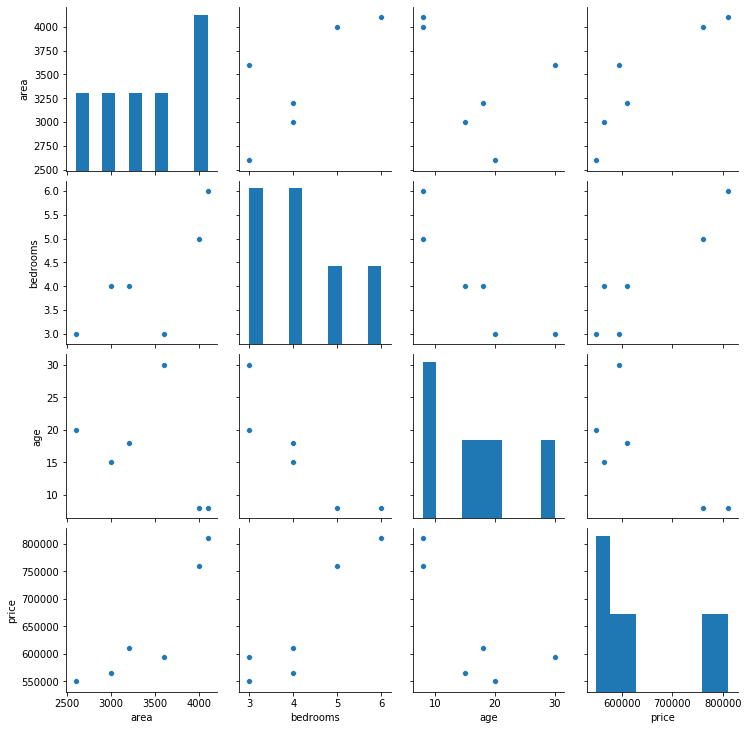

In [30]:
sns.pairplot(data1)

In [31]:
correlation=data1.corr()
correlation

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


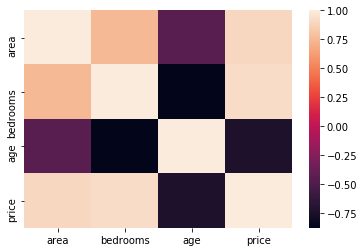

In [32]:
sns.heatmap(correlation)